# Pandas API

This notebook scopes out the capacities of the `pandas` API. Here and there I insert comparable `seaborn` plots (`seaborn` is better for composition but `pandas` is often fine for smaller plots).

In [1]:
import pandas as pd
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
%ls

big-box-plot.png                 seaborn_api_box_violin.ipynb
big-violin-plot.png              seaborn_api_categorical.ipynb
nyc_building_sales.csv           seaborn_api_model_fitting.ipynb
pandas_api.ipynb                 seaborn_api_multivariate.ipynb


In [4]:
sales = pd.read_csv("nyc_building_sales.csv")

/Users/Honors/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (23,26,28,29,70,71,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pd.set_option("max_columns", 500)

In [6]:
sales.head(1)

,Unnamed: 0,Index,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,ValueRatio
0,0,0,Bronx,2268.0,18.0,1800000.0,2500.0,221.538462,201.0,41.0,1002.0,7.0,8.0,10454.0,E083,40.0,4500.0,2.0,1.0,2A,532 EAST 142 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6,NaN,N,C1,2.0,0.0,P,"HAXHARI, GAC",2500.0,8125.0,0.0,8125.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,7.0,7.0,25.0,100.0,0.0,0.0,NaN,2.0,N,5.0,2.0,2197.0,216878.0,0.0,0.0,2015.0,NaN,0.0,0.0,NaN,NaN,3.25,2.43,0.0,4.8,2.0,2.022680e+09,0.0,41.0,1007305.0,234328.0,6a,NaN,209S029,20901.0,NaN,0.0,NaN,1.0,16v1,143700.0,620769.0,2035.0,0.250462,17.686154,76.402338,2.899629


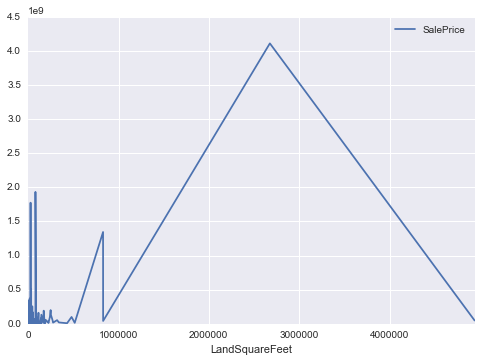

In [7]:
sales[['LandSquareFeet', 'SalePrice']].sort_values(by='LandSquareFeet').plot(x='LandSquareFeet', y='SalePrice')

## Bar chart

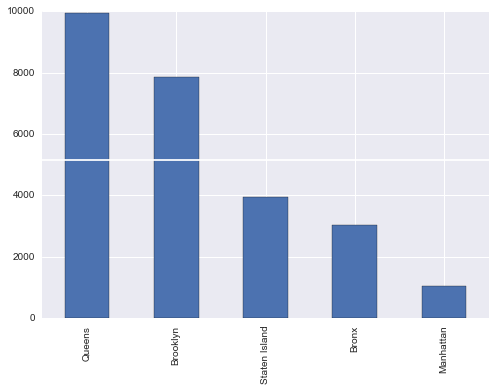

In [8]:
sales['Borough'].value_counts().plot.bar()
plt.axhline(np.mean(sales['Borough'].value_counts().values), color='w')

In [9]:
num_index = sales.groupby('Borough').count()['Index'].sort_values(ascending=False).index

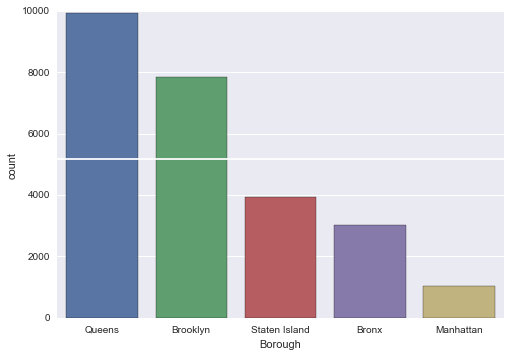

In [10]:
sns.countplot(x='Borough', data=sales, order=num_index)
plt.axhline(np.mean(sales['Borough'].value_counts().values), color='w')

`seaborn` doesn't sort the bars any particular way by default, you have to specify that manually using `order`, which requires computing that information&mdash;rather burdensome.

## Multi-bar bar chart

To plot a multi-line bar chart `pandas` input needs to be reshaped into the proper format.

First let's create a dummy variable that's interesting to look at.

In [11]:
owner_dummy = sales[sales['SalePrice'] < 1*10**9].copy()
owner_dummy['P/NP'] = (owner_dummy['OwnerType'] == 'P').replace(True, "P").replace(False, "NP")

I do the view in two different ways.

First way, manually using `groupby`.

In [15]:
owner_dummy[['Borough', 'P/NP', 'OwnerType']].groupby(['Borough', 'P/NP']).count().unstack('P/NP')

OwnerType      
P/NP                 NP     P
Borough                      
Bronx                10   430
Brooklyn             16  1084
Manhattan            10   389
Queens               26   495
Staten Island         9   140

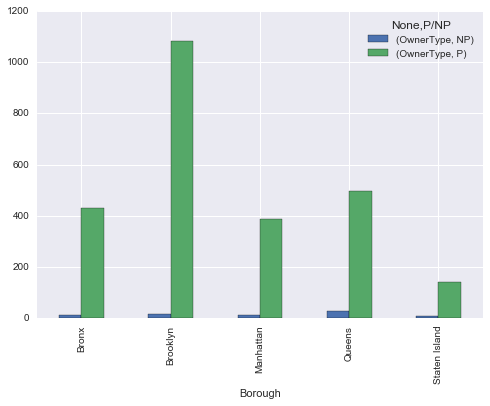

In [16]:
_.plot.bar()

Then using `pivot_table`, which does the same thing&mdash;almost. It does it a little more clearly because the `OwnerName` dummy is not instantiated as a multi-level column index.

FYI you can correct that annoyance in the `groupby` go-around using:

    _.columns = _.columns.get_level_values(1)

In [17]:
owner_dummy.pivot_table('OwnerName', index='Borough', columns='P/NP', aggfunc=pd.Series.count)

P/NP,NP,P
Borough,,
Bronx,2578,430
Brooklyn,6765,1084
Manhattan,658,389
Queens,9425,495
Staten Island,3805,140


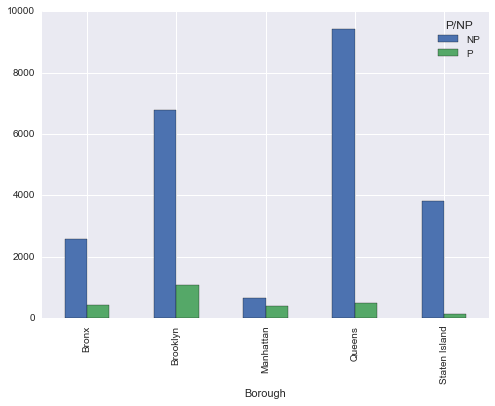

In [18]:
_.plot.bar()

`crosstab` currys `pivot_table` to make this aggregation a teensy bit easier to write:

In [19]:
pd.crosstab(owner_dummy['Borough'], owner_dummy['P/NP'])

P/NP,NP,P
Borough,,
Bronx,2593,430
Brooklyn,6766,1084
Manhattan,658,389
Queens,9444,495
Staten Island,3811,140


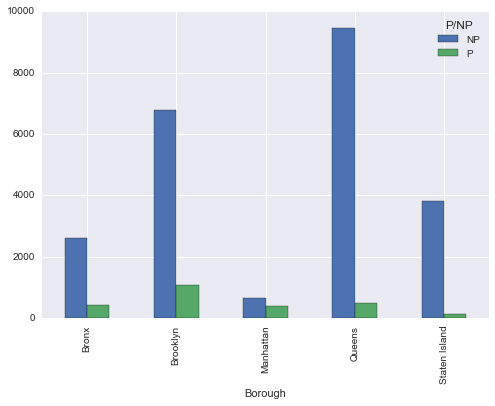

In [20]:
_.plot.bar()

This is all a *lot* easier in `seaborn`.

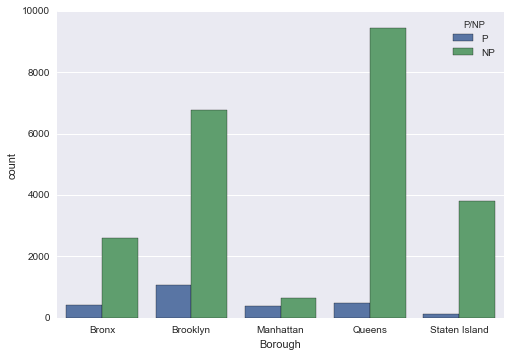

In [21]:
sns.countplot(x='Borough', hue='P/NP', data=owner_dummy)

`seaborn` makes a slightly weird distinction between `countplot` (what one would classically think of as a bar chart) and `barplot` (an aggregate-function chart not necessarily beholden to `pandas.Series.count`).

## Stacked bar chart

The `pandas` semantics are all the same, the only thing that changes is passing a `stacked=True` argument:

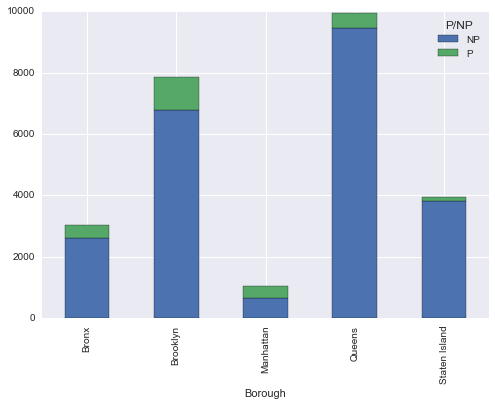

In [22]:
pd.crosstab(owner_dummy['Borough'], owner_dummy['P/NP']).plot.bar(stacked=True)

`seaborn` doesn't do stacked bar charts. If you really want it you can force the issue, see [this blog post](http://randyzwitch.com/creating-stacked-bar-chart-seaborn/), but it's not worthwhile, just use `pandas` for these.

## Horizontal bar chart

`pandas` defines a `barh` for these.

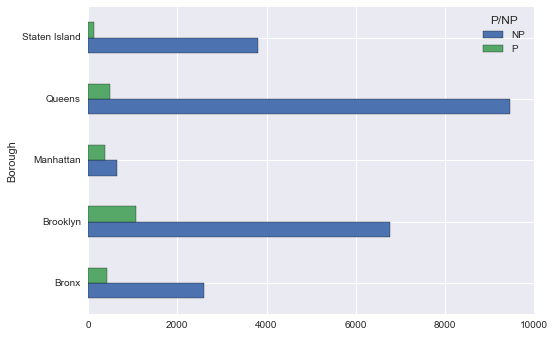

In [23]:
pd.crosstab(owner_dummy['Borough'], owner_dummy['P/NP']).plot.barh()

In `seaborn` you just change `x` to `y`.

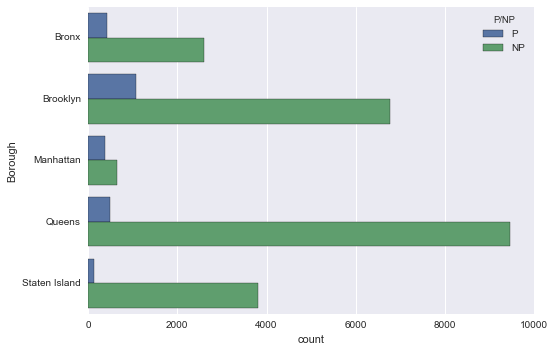

In [24]:
sns.countplot(y='Borough', hue='P/NP', data=owner_dummy)

K.

## Aggregated bar chart

These are bar charts using some sort of statistical aggregator besides `pd.Series.count`, e.g. (`np.mean`, `np.median`, etc.). Only `seaborn` has these.

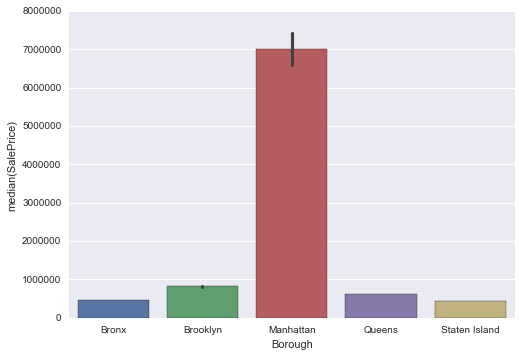

In [25]:
sns.barplot(data=owner_dummy, x='Borough', y='SalePrice', estimator=np.median)

`seaborn` also does small multiples, though I haven't explored that very heavily yet.

## Simple histogram

Easy to do in `pandas`.

In [26]:
small_owner_dummy = owner_dummy[owner_dummy['SalePrice'] < 1*10**6]

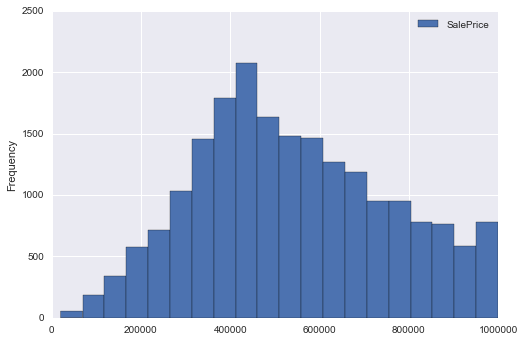

In [27]:
small_owner_dummy[['SalePrice']].plot.hist(bins=20)

Easy to do in `seaborn`, with the added benefit that you can add a rugplot or fit a KDE or any other distribution on top, so `seaborn` is much more powerful here.

Note that the KDE does reliably screw up the axis it's on.

/Users/Honors/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


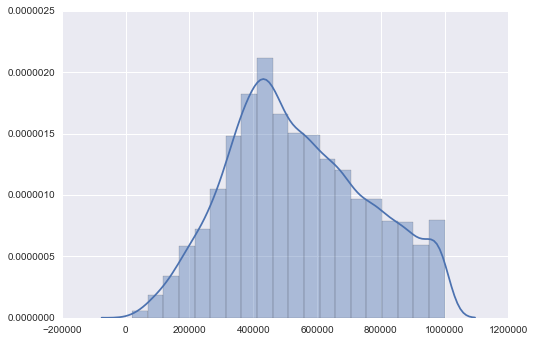

In [28]:
sns.distplot(small_owner_dummy[['SalePrice']], bins=20)

Note that both of these methods are touch-ups of `matplotlib.pyplot.hist`.

## Stacked histogram

The canonical example in `pandas` is once again observation-based.

In [29]:
pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000), 'c': np.random.randn(1000) - 1},
             columns=['a', 'b', 'c'])

,a,b,c
0,1.185412,-0.078326,-2.098923
1,-1.629026,-1.472228,-1.595853
2,0.939912,0.645803,-0.691367
3,2.302072,-1.314150,-1.930407
4,-0.538722,-0.175872,-0.181566
5,0.434153,-0.156184,-0.462962
6,-0.654005,1.524399,-0.890155
7,-0.045921,1.279870,-1.046501
8,0.876952,-0.783658,-0.490995
9,1.751585,-0.732682,-0.487082


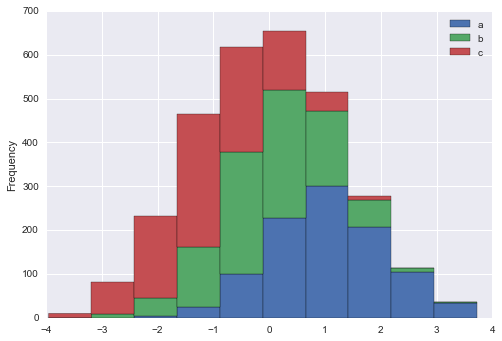

In [30]:
_.plot.hist(stacked=True)

You can use `pivot` or, as I've gotten used to `set_index()` and `unstack()` to reshape the data into this format.

In [31]:
d = small_owner_dummy[['SalePrice', 'P/NP']].set_index([small_owner_dummy.index, 'P/NP']).unstack('P/NP')

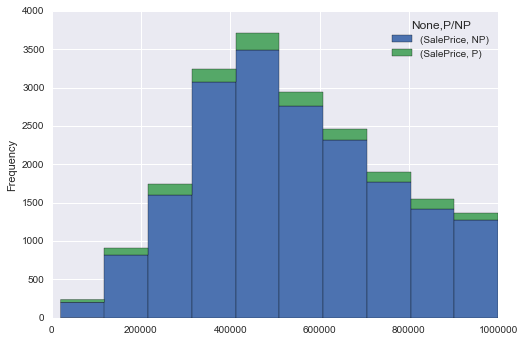

In [32]:
d.plot.hist(stacked=True)

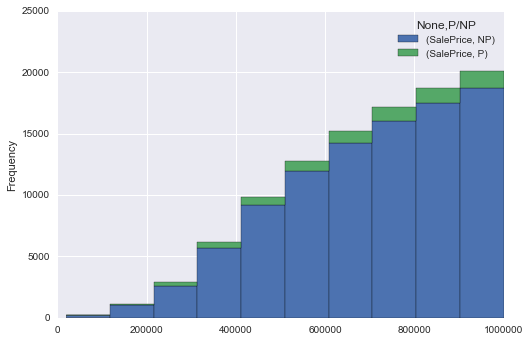

In [33]:
d.plot.hist(stacked=True, cumulative=True)

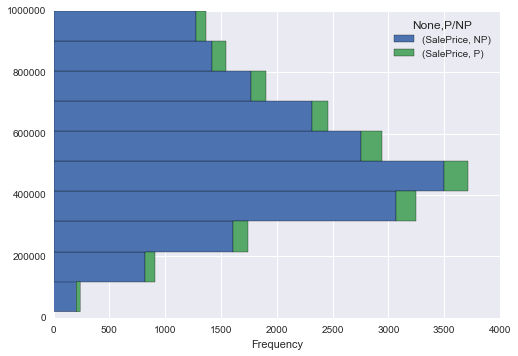

In [34]:
d.plot.hist(stacked=True, orientation='horizontal')

The issue with the useless multi-level columnular index is the same as it was in the bar chart examples, and the solution is again the same, actually use `pivot()` or use the following:

    _.columns = _.columns.get_level_values(1)
    
`seaborn` doesn't do this fancy stacking stuff...man.

## Boxplot

Again, note that the `pandas` plotter wants data in observational format.

Note that `seaborn` has a violin plot option too.

In [40]:
d = small_owner_dummy[['SalePrice', 'Borough']].set_index([small_owner_dummy.index, 'Borough']).unstack('Borough')
d.columns = d.columns.get_level_values(1)

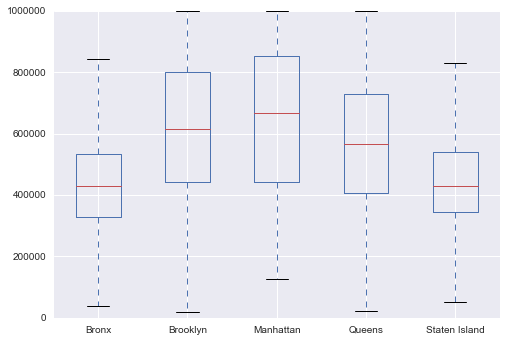

In [43]:
d.plot.box()

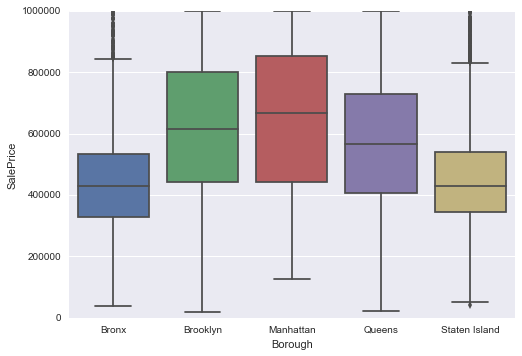

In [44]:
sns.boxplot(data=small_owner_dummy,
            x='Borough',
            y='SalePrice')

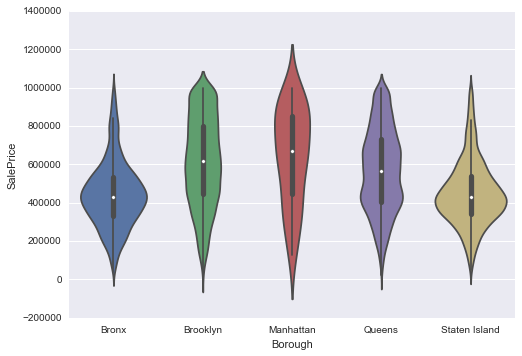

In [45]:
sns.violinplot(data=small_owner_dummy,
            x='Borough',
            y='SalePrice')

## Area plot

`pandas` has this chart type, `seaborn` does not. Once again we have to pivot the data into shape.

In [65]:
sales.groupby(['Borough']).apply(lambda df: len(df[df['YearBuilt'] > 0]))

Borough
Bronx            3022
Brooklyn         7849
Manhattan        1050
Queens           9935
Staten Island    3951
dtype: int64

In [67]:
sales.groupby(['Borough', 'YearBuilt']).count()['Index'].unstack('Borough')

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
YearBuilt,,,,,
0.0,1.0,1.0,1.0,4.0,NaN
1800.0,NaN,NaN,2.0,NaN,1.0
1827.0,NaN,NaN,1.0,NaN,NaN
1848.0,NaN,NaN,1.0,NaN,NaN
1849.0,NaN,NaN,1.0,NaN,NaN
1853.0,NaN,1.0,NaN,NaN,NaN
1880.0,NaN,NaN,3.0,1.0,1.0
1881.0,NaN,NaN,NaN,1.0,NaN
1882.0,NaN,NaN,1.0,NaN,NaN


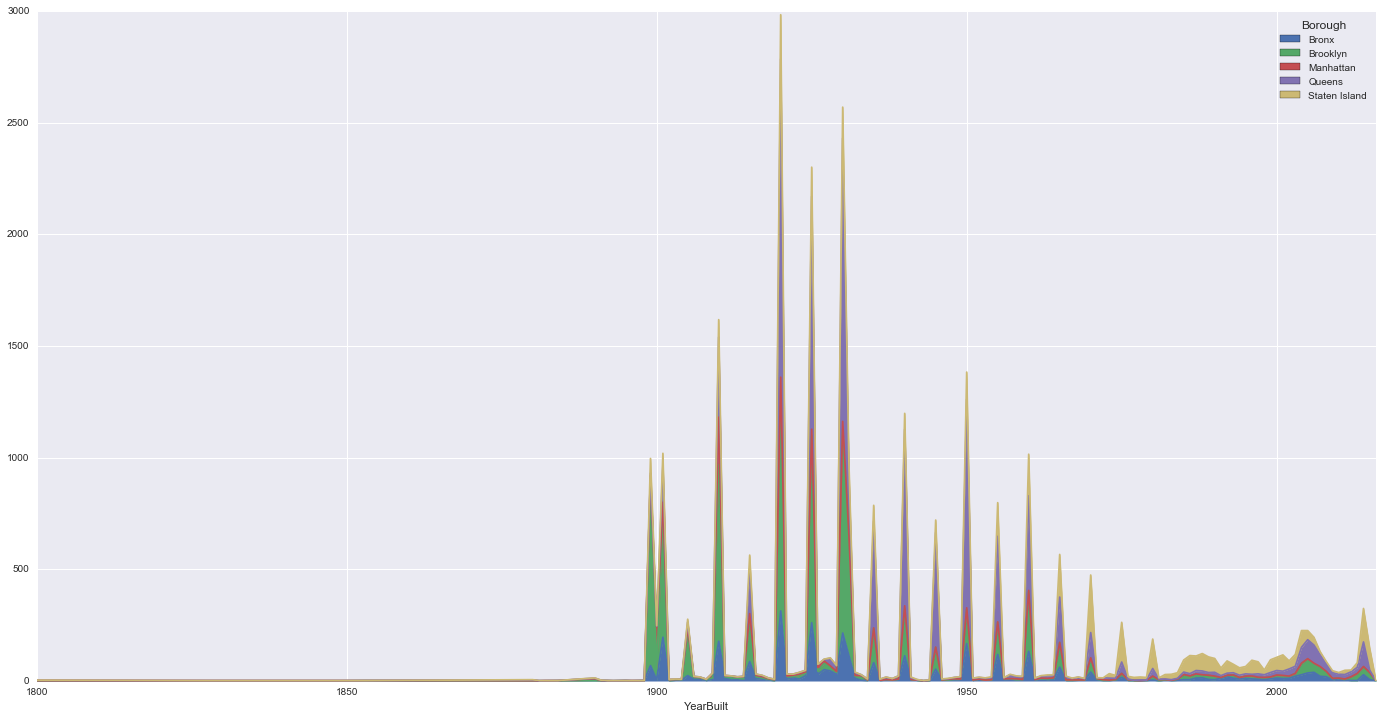

In [69]:
sales[sales['YearBuilt'] >= 1800].groupby(b['Borough', 'YearBuilt']).count()['Index'].unstack('Borough').plot.area(figsize=(24, 12))

Buildings they don't actually know the year built for they just assign to the nearest decade?!?

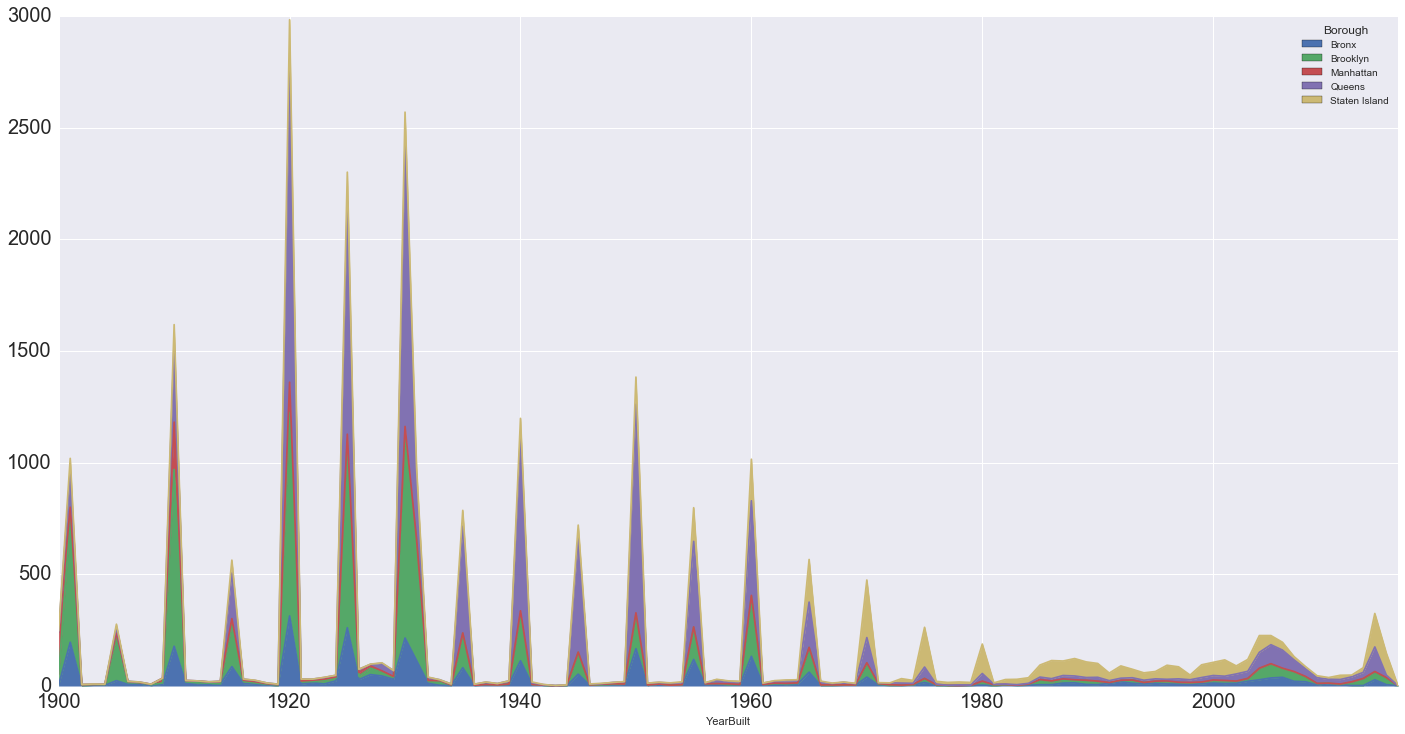

In [71]:
sales[sales['YearBuilt'] >= 1900].groupby(['Borough', 'YearBuilt']).count()['Index'].unstack('Borough').plot.area(figsize=(24, 12), fontsize=20)

So the reliable records start only at 1980!

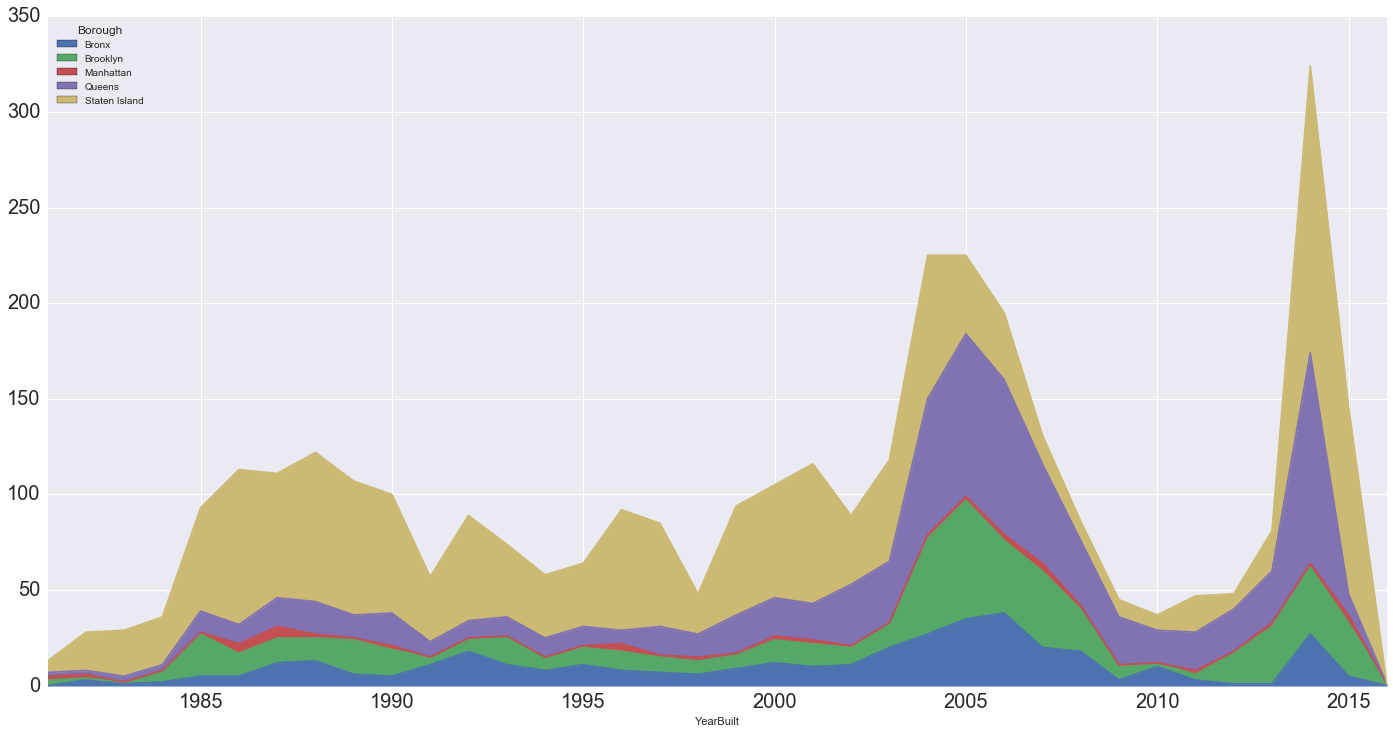

In [75]:
sales[sales['YearBuilt'] > 1980].groupby(['Borough', 'YearBuilt']).count()['Index'].unstack('Borough').plot.area(figsize=(24, 12), fontsize=20)